In [862]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [863]:
df=pd.read_csv('/content/drive/MyDrive/PUCP-Catolica-MachineLearning/Examen 3/bc.csv',sep=';')

In [864]:
df.head()

,Tiempo,s1,s2,s3,s4,s5,s6,s7,s8,s9,...,s22,s23,s24,s25,s26,s27,s28,s29,s30,diagnosis
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,2.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,3.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,4.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,5.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


# Preguna 1

Realizar un modelo de clasificación con árboles (max_depth = 4)
X:  utilizar las 2 variables que consideramos más importante (importance_feature: Ranking)
Plotear la frontera de clasificación y determinar el score y sensibilidad (trp)
y: diagnosis
Determina cuál es la clase que tiene más datos (0,1)


In [865]:
df.shape

(999, 32)

In [866]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tiempo     569 non-null    float64
 1   s1         569 non-null    float64
 2   s2         569 non-null    float64
 3   s3         569 non-null    float64
 4   s4         569 non-null    float64
 5   s5         569 non-null    float64
 6   s6         569 non-null    float64
 7   s7         569 non-null    float64
 8   s8         569 non-null    float64
 9   s9         569 non-null    float64
 10  s10        569 non-null    float64
 11  s11        569 non-null    float64
 12  s12        569 non-null    float64
 13  s13        569 non-null    float64
 14  s14        569 non-null    float64
 15  s15        569 non-null    float64
 16  s16        569 non-null    float64
 17  s17        569 non-null    float64
 18  s18        569 non-null    float64
 19  s19        569 non-null    float64
 20  s20       

In [867]:
df.isnull().sum()

Tiempo       430
s1           430
s2           430
s3           430
s4           430
s5           430
s6           430
s7           430
s8           430
s9           430
s10          430
s11          430
s12          430
s13          430
s14          430
s15          430
s16          430
s17          430
s18          430
s19          430
s20          430
s21          430
s22          430
s23          430
s24          430
s25          430
s26          430
s27          430
s28          430
s29          430
s30          430
diagnosis    430
dtype: int64

In [868]:
df.isnull().sum().sum()

13760

In [869]:
df.sample(50)

,Tiempo,s1,s2,s3,s4,s5,s6,s7,s8,s9,...,s22,s23,s24,s25,s26,s27,s28,s29,s30,diagnosis
366,367.0,20.200,26.83,133.70,1234.0,0.09905,0.16690,0.164100,0.12650,0.1875,...,33.81,160.00,1671.0,0.12780,0.34160,0.37030,0.21520,0.3271,0.07632,0.0
40,41.0,13.440,21.58,86.18,563.0,0.08162,0.06031,0.031100,0.02031,0.1784,...,30.25,102.50,787.9,0.10940,0.20430,0.20850,0.11120,0.2994,0.07146,0.0
72,73.0,17.200,24.52,114.20,929.4,0.10710,0.18300,0.169200,0.07944,0.1927,...,33.82,151.60,1681.0,0.15850,0.73940,0.65660,0.18990,0.3313,0.13390,0.0
900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,140.0,11.280,13.39,73.00,384.8,0.11640,0.11360,0.046350,0.04796,0.1771,...,15.77,76.53,434.0,0.13670,0.18220,0.08669,0.08611,0.2102,0.06784,1.0
826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
422,423.0,11.610,16.02,75.46,408.2,0.10880,0.11680,0.070970,0.04497,0.1886,...,19.67,81.93,475.7,0.14150,0.21700,0.23020,0.11050,0.2787,0.07427,1.0
355,356.0,12.560,19.07,81.92,485.8,0.08760,0.10380,0.103000,0.04391,0.1533,...,22.43,89.02,547.4,0.10960,0.20020,0.23880,0.09265,0.2121,0.07188,1.0
737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [870]:
df.describe()

,Tiempo,s1,s2,s3,s4,s5,s6,s7,s8,s9,...,s22,s23,s24,s25,s26,s27,s28,s29,s30,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,285.000000,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,164.400426,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,1.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,143.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,285.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,427.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,569.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [871]:
import missingno as msno

<AxesSubplot:>

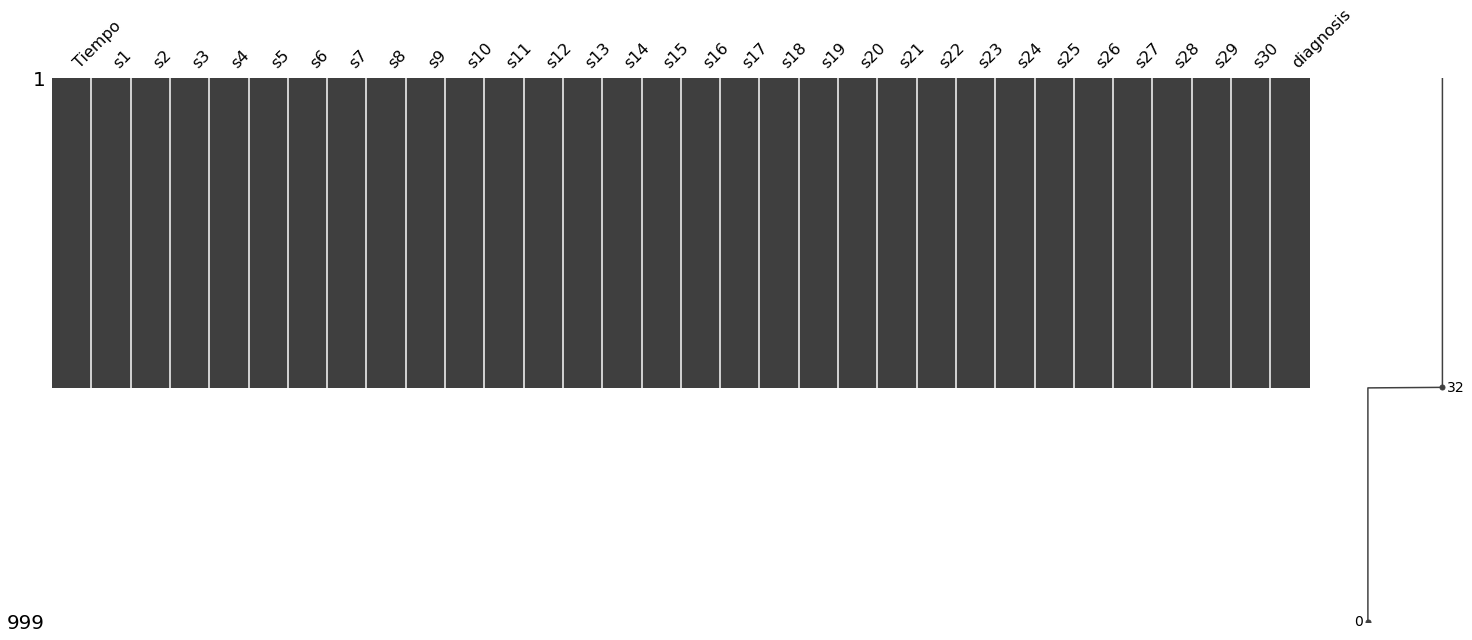

In [872]:
msno.matrix(df)

In [873]:
df=df.dropna()

In [874]:
df.isnull().sum()

Tiempo       0
s1           0
s2           0
s3           0
s4           0
s5           0
s6           0
s7           0
s8           0
s9           0
s10          0
s11          0
s12          0
s13          0
s14          0
s15          0
s16          0
s17          0
s18          0
s19          0
s20          0
s21          0
s22          0
s23          0
s24          0
s25          0
s26          0
s27          0
s28          0
s29          0
s30          0
diagnosis    0
dtype: int64

In [875]:
df.shape

(569, 32)

In [876]:
df['diagnosis'].value_counts()
# verificamos la variable target
# 0: indica maligno
# 1: indica Benigno

1.0    357
0.0    212
Name: diagnosis, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


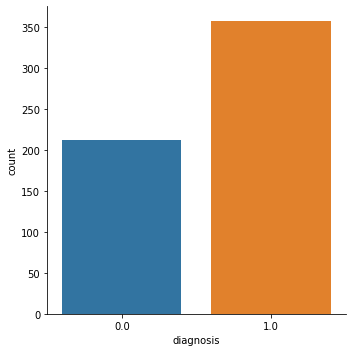

In [877]:
sns.catplot('diagnosis',data=df,kind='count')

## Randon Forest

In [878]:
df.columns

Index(['Tiempo', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10',
       's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20',
       's21', 's22', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's30',
       'diagnosis'],
      dtype='object')

In [879]:
#selecionamos la matriz caracteristica
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [880]:
X

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [881]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [882]:
from sklearn.ensemble import RandomForestClassifier
rfc=  RandomForestClassifier(n_estimators=100,random_state=100,max_depth=4)
# Ajustar el modelo a los datos de entrenamiento
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=100)

In [883]:
#prediciones de nuestros modelos
y_pred=rfc.predict(X_test)

In [884]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[46,  3],
       [ 2, 63]])

<AxesSubplot:>

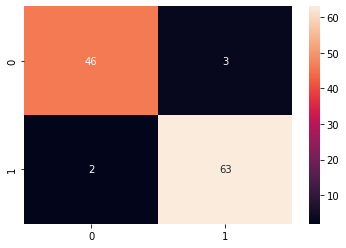

In [885]:
sns.heatmap(matrix,annot=True)

In [886]:
matrix=confusion_matrix(y_test,y_pred,normalize='true')
matrix

array([[0.93877551, 0.06122449],
       [0.03076923, 0.96923077]])

In [887]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95        49
         1.0       0.95      0.97      0.96        65

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.96       114
weighted avg       0.96      0.96      0.96       114



In [888]:
rfc.score(X_test,y_test)

0.956140350877193

In [889]:
rfc_accuray=accuracy_score(y_pred,y_test)
rfc_accuray

0.956140350877193

## Raking de Variables

In [890]:
features=X.columns

In [891]:
features

Index(['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11',
       's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21',
       's22', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's30'],
      dtype='object')

In [892]:
# Este atributo tiene una medida de la importancia de cada feature
feature_importance = rfc.feature_importances_ 

print('Features: {}'.format(features))
print('Importancia = {}'.format(feature_importance))

Features: Index(['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11',
       's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21',
       's22', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's30'],
      dtype='object')
Importancia = [0.05956204 0.00995588 0.06371845 0.05101672 0.00644236 0.01444339
 0.04926455 0.11589047 0.00348726 0.00295141 0.00919754 0.00304206
 0.00805026 0.02572278 0.00353048 0.00227777 0.0069047  0.00382071
 0.00265617 0.00361586 0.09038595 0.0176034  0.12932371 0.12018221
 0.01656713 0.0114024  0.02951872 0.12754678 0.00755369 0.00436513]


In [893]:
#importancia de variables
var_imp = pd.DataFrame({
 'feature':features, 
 'v_importance':rfc.feature_importances_.tolist()
 })

In [894]:
print(var_imp.sort_values(by = 'v_importance', ascending=False))

   feature  v_importance
22     s23      0.129324
27     s28      0.127547
23     s24      0.120182
7       s8      0.115890
20     s21      0.090386
2       s3      0.063718
0       s1      0.059562
3       s4      0.051017
6       s7      0.049265
26     s27      0.029519
13     s14      0.025723
21     s22      0.017603
24     s25      0.016567
5       s6      0.014443
25     s26      0.011402
1       s2      0.009956
10     s11      0.009198
12     s13      0.008050
28     s29      0.007554
16     s17      0.006905
4       s5      0.006442
29     s30      0.004365
17     s18      0.003821
19     s20      0.003616
14     s15      0.003530
8       s9      0.003487
11     s12      0.003042
9      s10      0.002951
18     s19      0.002656
15     s16      0.002278


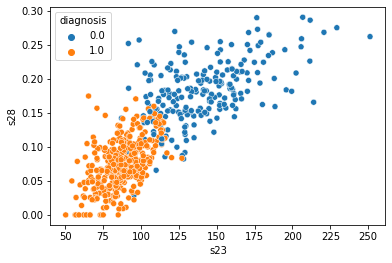

In [895]:
sns.scatterplot(data =df, x = 's23', y= 's28', hue='diagnosis')
plt.show()

In [896]:
df.shape

(569, 32)

In [897]:
# selección de matriz de características
features = ['s23','s28']

X = df.loc[:,features]
y = df['diagnosis']

In [898]:
# Dividir el data set en conjunto de entrenamiento y conjunto de testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(455, 2) (114, 2) (455,) (114,)


In [899]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


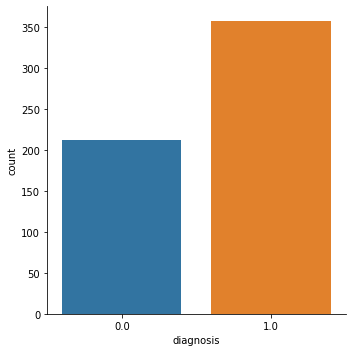

In [900]:
sns.catplot('diagnosis', data = df, kind ='count')

In [901]:
# Ajustar el Random Forest con el dataset
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 100,max_depth = 4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=100)

In [902]:
# Predicción de nuestros modelos
y_pred = model.predict(X_test)

In [903]:
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[46,  3],
       [ 0, 65]])

In [904]:
matrix = confusion_matrix(y_test,y_pred,normalize='true')
matrix

array([[0.93877551, 0.06122449],
       [0.        , 1.        ]])

<AxesSubplot:>

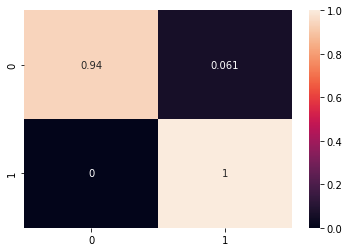

In [905]:
sns.heatmap(matrix,annot=True)

In [906]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9736842105263158

In [907]:
model.score(X_test,y_test)

0.9736842105263158

In [908]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        49
         1.0       0.96      1.00      0.98        65

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



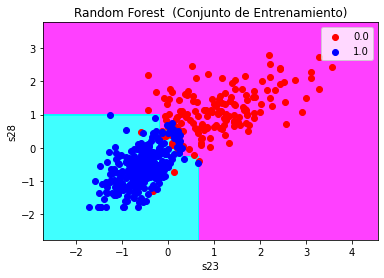

In [909]:
#plt.figure(figsize=(16,8))

# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train

# Hace el plot de colores sólidos

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# El plor de puntos rojos y azules

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)

plt.title('Random Forest  (Conjunto de Entrenamiento)')
plt.xlabel('s23')
plt.ylabel('s28')
plt.legend()
plt.show()

# Pregunta 2

Balancear la data utilizando el balanceo ROS (oversampling)
Utilizar las 2 variables que consideras más importantes en la pregunta 1
Plotear la frontera de clasificación y determinar el score y sensibilidad

In [910]:
# determinarmos la cantidad de clase 0 y 1 del df

cant_clase_0, canti_clase_1 = df.diagnosis.value_counts()
print(cant_clase_0, canti_clase_1)

357 212


In [911]:
clase_0 = df.loc[df.diagnosis == 0, ['s23','s28','diagnosis']]
clase_1 = df.loc[df.diagnosis == 1, ['s23','s28','diagnosis']]
len(clase_1)

357

In [912]:
clase_1_rus = clase_1.sample(canti_clase_1,replace = True)
len(clase_1_rus)

212

In [913]:
df_train = pd.concat([clase_0,clase_1_rus], axis = 0)
df_train.diagnosis.value_counts()

0.0    212
1.0    212
Name: diagnosis, dtype: int64

In [914]:
new_X_train = df_train.iloc[:, :-1]
new_y_train = df_train.iloc[:, -1]

print(len(new_X_train))

424


In [915]:
sc_X = StandardScaler()
new_X_train = sc_X.fit_transform(new_X_train)

In [916]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 100, max_depth=4)
model.fit(new_X_train, new_y_train)

DecisionTreeClassifier(max_depth=4, random_state=100)

In [917]:
y_pred2 = model.predict(X_test)

In [918]:
matrix = confusion_matrix(y_test,y_pred2)
matrix

array([[49,  0],
       [11, 54]])

In [919]:
matrix = confusion_matrix(y_test,y_pred2,normalize='true')
matrix

array([[1.        , 0.        ],
       [0.16923077, 0.83076923]])

<AxesSubplot:>

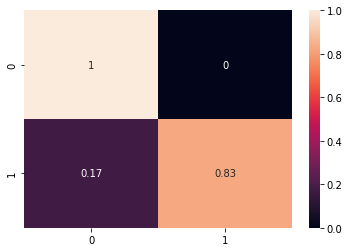

In [920]:
sns.heatmap(matrix,annot=True)

In [921]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred2)
accuracy

0.9035087719298246

In [922]:
model.score(X_test,y_test)

0.9035087719298246

In [923]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90        49
         1.0       1.00      0.83      0.91        65

    accuracy                           0.90       114
   macro avg       0.91      0.92      0.90       114
weighted avg       0.92      0.90      0.90       114



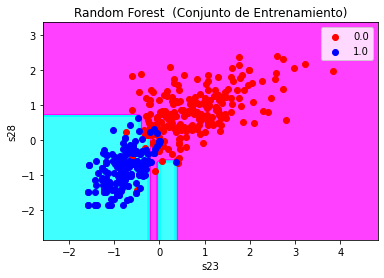

In [924]:
from matplotlib.colors import ListedColormap
X_set, y_set = new_X_train, new_y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Random Forest  (Conjunto de Entrenamiento)')
plt.xlabel('s23')
plt.ylabel('s28')
plt.legend()
plt.show()

# Pregunta 3

Balancear la data utilizando el balanceo SMOTE
Utilizar las 2 variables que consideras más importantes en la pregunta 1
Plotear la frontera de clasificación y determinar el score y sensibilidad

In [925]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [926]:
from imblearn.over_sampling import SMOTE

In [927]:
X = df.loc[:,['s23','s28']]
y = df.diagnosis

In [928]:
smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X,y)

In [929]:
# creamos la data balanceada
df_X_sm = pd.DataFrame(data = X_sm, columns = X.columns)
df_y_sm = pd.DataFrame(data = y_sm, columns = ['diagnosis'])

# concatenamos la data
df_balanceado_sm = pd.concat([df_X_sm,df_y_sm],axis =1)

df_balanceado_sm.head()

,s23,s28,diagnosis
0,184.60,0.2654,0.0
1,158.80,0.1860,0.0
2,152.50,0.2430,0.0
3,98.87,0.2575,0.0
4,152.20,0.1625,0.0


In [930]:
df_balanceado_sm.diagnosis.value_counts()

0.0    357
1.0    357
Name: diagnosis, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


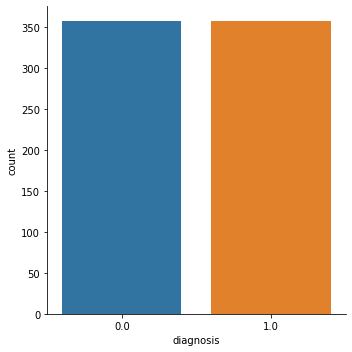

In [931]:
sns.catplot('diagnosis', data = df_balanceado_sm, kind = 'count')

In [932]:
# matriz de características balanceada
X_balaced = df_balanceado_sm.iloc[:,:-1]
y_balance = df_balanceado_sm.iloc[:,-1]

In [933]:
X_train_balance, X_test_balance, y_train_balance, y_test_balance = train_test_split(X_balaced, y_balance, test_size = 0.2, random_state =100)

In [934]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_b = sc_X.fit_transform(X_train_balance)
X_test_b = sc_X.transform(X_test_balance)

In [935]:
tree_balance = DecisionTreeClassifier(max_depth=4,random_state = 100)
tree_model_balance = tree_balance.fit(X_train_b, y_train_balance)

In [936]:
len(X_test)

114

In [937]:
y_pred_2 = tree_model_balance.predict(X_test)

In [938]:
matrix = confusion_matrix(y_test,y_pred_2)
matrix

array([[49,  0],
       [14, 51]])

In [939]:
matrix = confusion_matrix(y_test,y_pred_2,normalize='true')
matrix

array([[1.        , 0.        ],
       [0.21538462, 0.78461538]])

<AxesSubplot:>

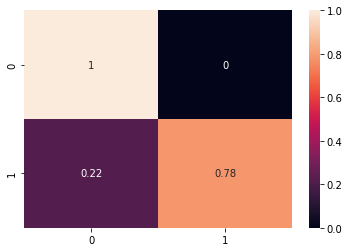

In [940]:
sns.heatmap(matrix,annot=True)

In [941]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_2)

0.8771929824561403

In [943]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88        49
         1.0       1.00      0.78      0.88        65

    accuracy                           0.88       114
   macro avg       0.89      0.89      0.88       114
weighted avg       0.90      0.88      0.88       114



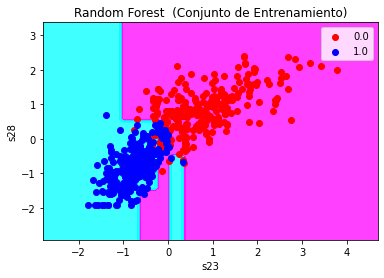

In [945]:
#plt.figure(figsize=(16,8))

from matplotlib.colors import ListedColormap
X_set, y_set = X_train_b, y_train_balance
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
plt.contourf(X1, X2, tree_model_balance.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Random Forest  (Conjunto de Entrenamiento)')
plt.xlabel('s23')
plt.ylabel('s28')
plt.legend()
plt.show()

# Pregunta 4

Comparamos los 3 modelos previos y recomendar el mejor y por que?